<a href="https://colab.research.google.com/github/laryskasagan/Machine_Learning/blob/main/PenguinsDecisionForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_decision_forests

import tensorflow_decision_forests as tfdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 69.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data = sns.load_dataset('penguins')

data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Dataset contains both numerical and categorical variables - examples of categorical columns include *species*, *island*, and *sex*. Additionally, there are missing values in the dataset that will need to be handled during preprocessing.

In [ ]:
# Preprocessing
data.dropna(inplace=True)

A quick peek at the summary statistics of the dataset

In [ ]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
categorical_cols = data.select_dtypes(include=['object','category']).columns

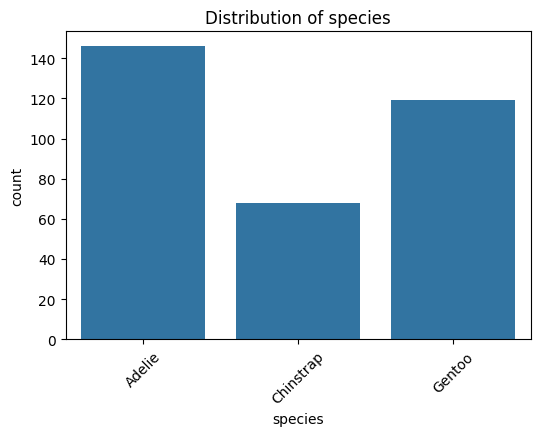

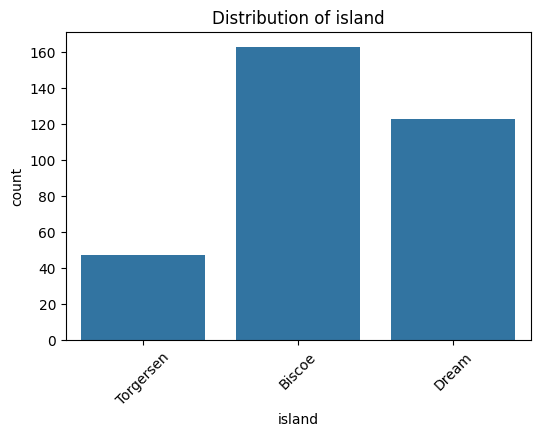

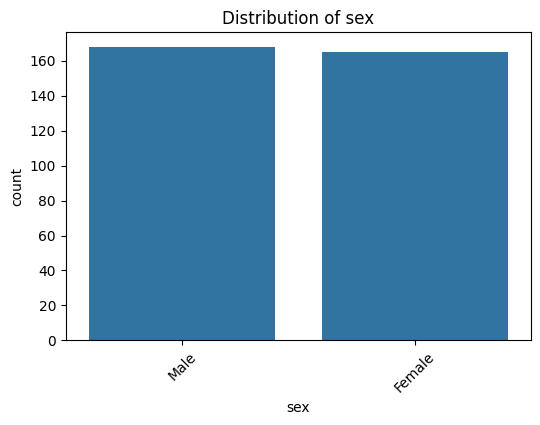

In [ ]:
for cols in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data=data, x=cols)
  plt.title(f'Distribution of {cols}')
  plt.xticks(rotation=45)
  plt.show()

Separate numerical and categorical columns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


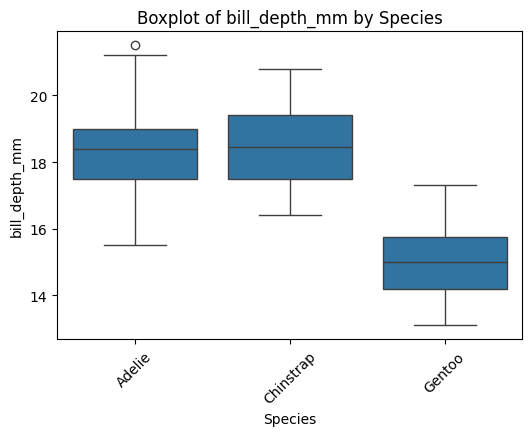

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


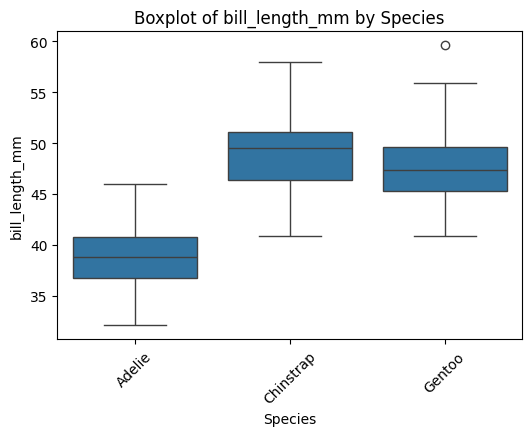

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


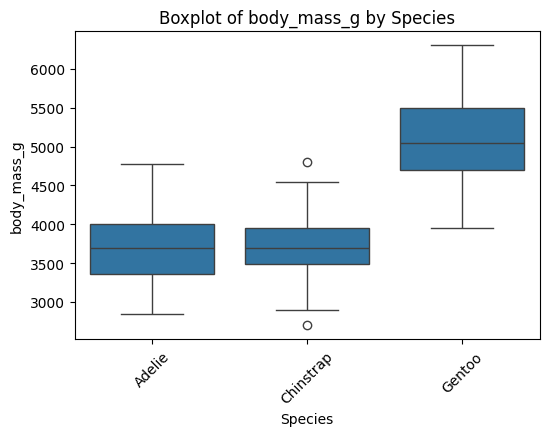

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


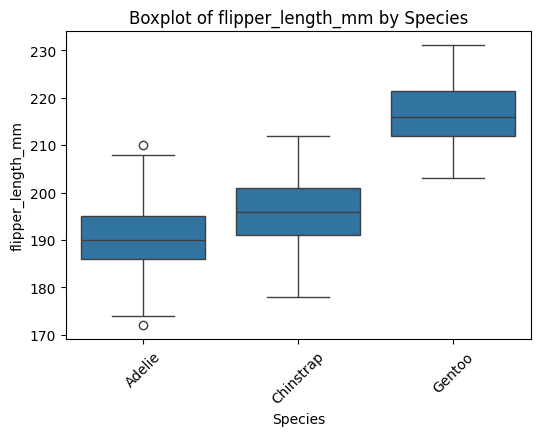

In [ ]:
numeric_features = data.select_dtypes(include=['float64','int64']).columns.difference(['species'])

for feature in numeric_features:
  plt.figure(figsize=(6,4))
  sns.boxplot(x='species', y=feature, data=data)
  plt.title(f'Boxplot of {feature} by Species')
  plt.xlabel('Species')
  plt.ylabel(feature)
  plt.xticks(rotation=45)
  plt.show()


Converting categorical variables into numerical format, using Label Encoders. This process assigns a unique integer to each category in columns like species, island, or sex, allowing the categorical data to be used in machine learning models.

In [ ]:
species_encoder = LabelEncoder()
island_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

data['species'] = species_encoder.fit_transform(data['species'])
data['island'] = island_encoder.fit_transform(data['island'])
data['sex'] = sex_encoder.fit_transform(data['sex'])

species_mapping = dict(zip(species_encoder.classes_,range(len(species_encoder.classes_))))
island_mapping = dict(zip(island_encoder.classes_,range(len(island_encoder.classes_))))
sex_mapping = dict(zip(sex_encoder.classes_,range(len(sex_encoder.classes_))))

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='species')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='species')

model = tfdf.keras.RandomForestModel()
model.fit(train_ds, verbose=2)

Use /tmp/tmpn7nmkbgm as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'flipper_length_mm':

I0000 00:00:1728197680.848099    1264 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1728197680.848139    1264 kernel.cc:775] Collect training examples
I0000 00:00:1728197680.848154    1264 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1728197680.848673    1264 kernel.cc:394] Number of batches: 1
I0000 00:00:1728197680.848693    1264 kernel.cc:395] Number of examples: 233
I0000 00:00:1728197680.848741    1264 kernel.cc:794] Training dataset:
Number of records: 233
Number of columns: 7

Number of columns by type:
	NUMERICAL: 6 (85.7143%)
	CATEGORICAL: 1 (14.2857%)

Columns:

NUMERICAL: 6 (85.7143%)
	1: "bill_depth_mm" NUMERICAL m

Model trained in 0:00:00.382013
Compiling model...
Model compiled.


Key Performance Metrics:


1.   **Accuracy** - proportion of correct predictions among the total number of cases processed is approximately 96.99%.

This suggests that our model is quite adept at distinguishing among different species

2.   **Log loss** or logarithmic loss is a performance metric for evaluating the probabilities outputed by our model against the actual labels. A lower log loss indicating a better model.

Log loss is around 0.091, which is quite low, hinting that our model is confident and precise in its probability estimates.

3.   **Error rate** complements accuracy by showing the proportion of incorrect predictions.

About 3% aligning well with a high accuracy to confirm the model's effectiveness

The model predicted species 1 correctly 94 times, but mistakenly predicted it as species 2, 4 times. For species 2, 49 predictions were accurate while 1 was incorrect. Species 3 was predicted almost perfectly with 83 correct predictions and only 2 misclassifications as species 2.

Inspector lets us peek into the model and gather information about its operations and the features influencing its predictions.

In [ ]:
inspector = model.make_inspector()

importance_types = inspector.variable_importances().keys()

for importance_type in importance_types:
  print('\n' + '=' * 30)
  print(f'Importance type: {importance_type}')
  print('-' * 30)
  importances = inspector.variable_importances()[importance_type]
  sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_importances:
    feature_name = feature.name if isinstance(feature, tfdf.py_tree.dataspec.SimpleColumnSpec) else feature
    print(f'{feature_name:20} {importance:.4f}')

print('\n' + '=' * 30)


Importance type: INV_MEAN_MIN_DEPTH
------------------------------
bill_depth_mm        0.4227
bill_length_mm       0.4119
flipper_length_mm    0.3735
island               0.3060
body_mass_g          0.2759
sex                  0.2452

Importance type: NUM_NODES
------------------------------
bill_length_mm       630.0000
bill_depth_mm        348.0000
body_mass_g          302.0000
flipper_length_mm    267.0000
island               245.0000
sex                  30.0000

Importance type: SUM_SCORE
------------------------------
bill_length_mm       23859.0603
bill_depth_mm        21419.3378
flipper_length_mm    16734.7522
island               6425.7241
body_mass_g          2557.7010
sex                  303.6369

Importance type: NUM_AS_ROOT
------------------------------
bill_depth_mm        143.0000
flipper_length_mm    115.0000
bill_length_mm       41.0000
body_mass_g          1.0000



In [ ]:
test_predictions = model.predict(test_ds)
predicted_labels = np.argmax(test_predictions, axis=1)

test_labels = test_data['species'].values

accuracy= accuracy_score(test_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('\nConfusion Matrix:')
print(conf_matrix)

species_names = species_encoder.classes_
report = classification_report(test_labels, predicted_labels, target_names = species_names)
print('\nClassification Report:')
print(report)

1/1 [==============================] - 0s 44ms/step
Accuracy: 0.99

Confusion Matrix:
[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

